In [1]:
import os
os.chdir('../')

In [2]:
import geopandas as gpd
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [3]:
gadm_1_v = pd.read_csv("combined_dataset/GADM_1_variables.csv")
gadm_1_geo = gpd.read_file("combined_dataset/GADM_1_geometries.gpkg")
gadm_1 = gadm_1_geo.merge(gpd.GeoDataFrame(gadm_1_v), on='GID_1', how='inner')

In [6]:
gadm_1.columns.tolist()[:15]

['GID_1',
 'geometry',
 'Unnamed: 0',
 'GID_0',
 'COUNTRY',
 'NAME_1',
 'VARNAME_1',
 'NL_NAME_1',
 'TYPE_1',
 'ENGTYPE_1',
 'CC_1',
 'ISO_1',
 'HASC_1',
 'pysw_ref',
 'geo_id']

In [10]:
gadm_1['ISO_1']

0      SN-DK
1      SN-DB
2      SN-FK
3      SN-KA
4      SN-KL
       ...  
437      NaN
438    BI-MW
439    BI-NG
440    BI-RT
441    BI-RY
Name: ISO_1, Length: 442, dtype: object

In [52]:
test_df[[x for x in test_df.columns.tolist() if 'FB' in x]]

,FB_pntr_13p_all,FB_pntr_13p_female,FB_pntr_13p_male,FB_pntr_15p_all,FB_pntr_15p_female,FB_pntr_15p_male,FB_pntr_18p_all,FB_pntr_18p_female,FB_pntr_18p_male,FB_pntr_15to24_all,...,FB_pntr_60p_male,FB_pntr_15to49_all,FB_pntr_15to49_female,FB_pntr_15to49_male,FB_pntr_18to24_all,FB_pntr_18to24_female,FB_pntr_18to24_male,FB_pntr_18to49_all,FB_pntr_18to49_female,FB_pntr_18to49_male
0,0.752465,0.566949,0.942864,0.801666,0.605757,1.000000,0.843896,0.640957,1.000000,0.755801,...,0.970618,0.829810,0.628039,1.000000,0.912292,0.684815,1.000000,0.883215,0.694858,1.000000
1,0.107533,0.060661,0.160081,0.116981,0.063893,0.173023,0.120761,0.068052,0.182359,0.144739,...,0.067573,0.130968,0.072651,0.201664,0.186524,0.110891,0.278089,0.137935,0.076701,0.215076
2,0.090844,0.056156,0.131863,0.100001,0.061443,0.146106,0.102768,0.059315,0.145546,0.150655,...,0.045248,0.116952,0.071729,0.165704,0.178056,0.110860,0.233101,0.120130,0.070498,0.174835
3,0.047257,0.024552,0.072041,0.051859,0.026820,0.079447,0.052447,0.027371,0.076883,0.071756,...,0.024103,0.055913,0.029812,0.090889,0.087751,0.046745,0.131175,0.061114,0.030955,0.089508
4,0.272561,0.163229,0.394527,0.283224,0.171854,0.436181,0.302745,0.180427,0.457600,0.341858,...,0.196728,0.322444,0.187963,0.489291,0.438288,0.273804,0.614466,0.353035,0.205116,0.525189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437,0.023311,0.013011,0.033773,0.025581,0.013936,0.036272,0.026734,0.014510,0.038207,0.030850,...,0.009076,0.028555,0.015795,0.041628,0.038583,0.022609,0.054409,0.030437,0.016790,0.045370
438,0.004081,0.002534,0.005875,0.004429,0.002744,0.006392,0.004942,0.002038,0.007143,0.004575,...,0.000000,0.004941,0.002279,0.008088,0.006741,0.004164,0.009762,0.005680,0.002613,0.009329
439,0.055094,0.035735,0.075766,0.060078,0.038185,0.082479,0.062497,0.039094,0.087264,0.077200,...,0.024703,0.067642,0.043390,0.095502,0.092975,0.063852,0.124529,0.074774,0.045306,0.103416
440,0.009448,0.004453,0.014693,0.010014,0.004193,0.016117,0.010471,0.003942,0.017290,0.013514,...,0.000000,0.011617,0.004998,0.018691,0.016953,0.008858,0.029016,0.012431,0.003854,0.020553


In [37]:
# Checking how SCI correlates to FB penetration

In [49]:
test_df = gadm_1.filter([x for x in gadm_1.columns.tolist() if 'FB_pntr' in x] + ['Mean_SCI_with_Self'])


In [50]:
#test_df.columns
test_df = test_df.dropna()
#test_df['SCI'] = (test_df['SCI']-test_df['SCI'].mean())/test_df['SCI'].std()

In [51]:
y = test_df[[x for x in test_df.columns.tolist() if 'FB_pntr' in x]]
x = test_df['Mean_SCI_with_Self']

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

ValueError: shapes (441,27) and (441,27) not aligned: 27 (dim 1) != 441 (dim 0)

### Checking FB penetration

In [29]:
selected_cols = [x for x in gadm_1.columns.tolist() if 'SCI' in x] + [x for x in gadm_1.columns.tolist() if 'FB_pntr' in x] + [x for x in gadm_1.columns.tolist() if 'connection_index' in x] 
FB_pntr_sci = gadm_1.filter(selected_cols)

In [30]:
FB_pntr_sci = FB_pntr_sci.dropna()

In [31]:
FB_pntr_sci.head()

,Mean_SCI_with_Self,Median_SCI_with_Self,Std_SCI_with_Self,SCI,Mean_SCI_without_Self,Median_SCI_without_Self,Std_SCI_without_Self,Mean_dist_to_SCI,Median_dist_to_SCI,Std_dist_to_SCI,...,FB_pntr_15to49_female,FB_pntr_15to49_male,FB_pntr_18to24_all,FB_pntr_18to24_female,FB_pntr_18to24_male,FB_pntr_18to49_all,FB_pntr_18to49_female,FB_pntr_18to49_male,Intraconnection_index,LMIC_interconnection_index
0,696.570284,24.0,10536.898519,5564900,644.215448,24.0,9441.361664,38.787583,39.158016,19.172216,...,0.628039,1.000000,0.912292,0.684815,1.000000,0.883215,0.694858,1.000000,0.075277,0.831708
1,764.617474,8.0,32983.109986,6108529,406.319980,8.0,7892.321344,37.881024,38.270044,19.005464,...,0.072651,0.201664,0.186524,0.110891,0.278089,0.137935,0.076701,0.215076,0.468664,0.476444
2,1856.071098,11.0,121721.519195,14828152,498.239609,11.0,9314.991223,37.953148,38.065188,18.968335,...,0.071729,0.165704,0.178056,0.110860,0.233101,0.120130,0.070498,0.174835,0.731596,0.248339
3,2087.346977,12.0,132412.978011,16675815,610.569604,12.0,10498.993410,37.064183,37.188574,18.767780,...,0.029812,0.090889,0.087751,0.046745,0.131175,0.061114,0.030955,0.089508,0.707527,0.277444
4,3582.800976,8.0,272274.212869,28622997,538.656485,8.0,10033.398311,37.598482,37.623396,18.876677,...,0.187963,0.489291,0.438288,0.273804,0.614466,0.353035,0.205116,0.525189,0.849674,0.141557


In [32]:
# Normalised df
FB_pntr_sci_normed = (FB_pntr_sci-FB_pntr_sci.mean())/FB_pntr_sci.std()

In [33]:
FB_pntr_sci_normed.head()

,Mean_SCI_with_Self,Median_SCI_with_Self,Std_SCI_with_Self,SCI,Mean_SCI_without_Self,Median_SCI_without_Self,Std_SCI_without_Self,Mean_dist_to_SCI,Median_dist_to_SCI,Std_dist_to_SCI,...,FB_pntr_15to49_female,FB_pntr_15to49_male,FB_pntr_18to24_all,FB_pntr_18to24_female,FB_pntr_18to24_male,FB_pntr_18to49_all,FB_pntr_18to49_female,FB_pntr_18to49_male,Intraconnection_index,LMIC_interconnection_index
0,-0.716663,0.247610,-0.678619,-0.716663,-0.638219,0.248061,-0.547535,1.954616,2.192606,1.154093,...,2.229668,3.270056,2.630457,2.002710,2.698655,2.911851,2.404672,3.126091,-1.803987,1.609771
1,-0.701610,-0.679253,-0.596332,-0.701610,-0.764765,-0.678770,-0.572584,1.759870,2.003521,1.094886,...,-0.308827,0.015689,-0.106949,-0.278343,0.105191,-0.177277,-0.316251,0.014096,0.107852,-0.223159
2,-0.460163,-0.505466,-0.271021,-0.460163,-0.715869,-0.504989,-0.549578,1.775364,1.959898,1.081703,...,-0.313038,-0.130899,-0.138888,-0.278463,-0.056431,-0.251075,-0.343555,-0.145449,1.385688,-1.400035
3,-0.409001,-0.447537,-0.231827,-0.409001,-0.656116,-0.447062,-0.530431,1.584397,1.773231,1.010494,...,-0.504630,-0.435877,-0.479494,-0.533290,-0.422600,-0.495692,-0.517613,-0.483744,1.268713,-1.249873
4,-0.078182,-0.679253,0.280898,-0.078182,-0.694370,-0.678770,-0.537961,1.699175,1.865823,1.049159,...,0.218227,1.188184,0.842641,0.369153,1.313623,0.714298,0.248990,1.243602,1.959540,-1.950961


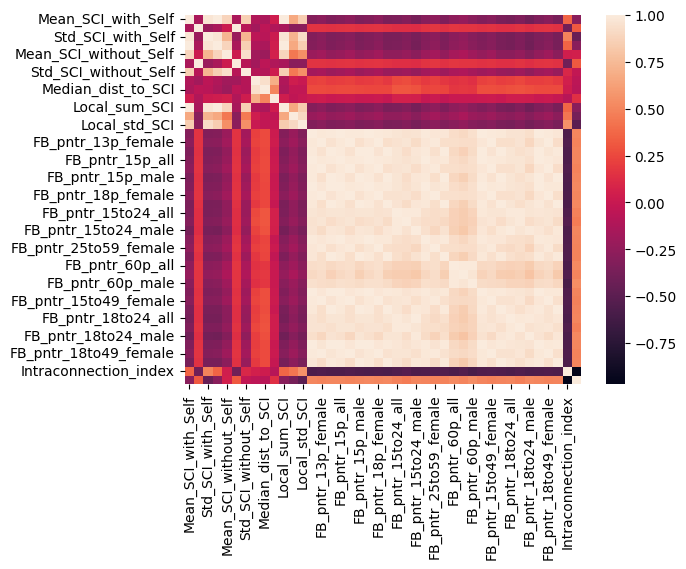

In [34]:
sns.heatmap(FB_pntr_sci.corr())
plt.show()

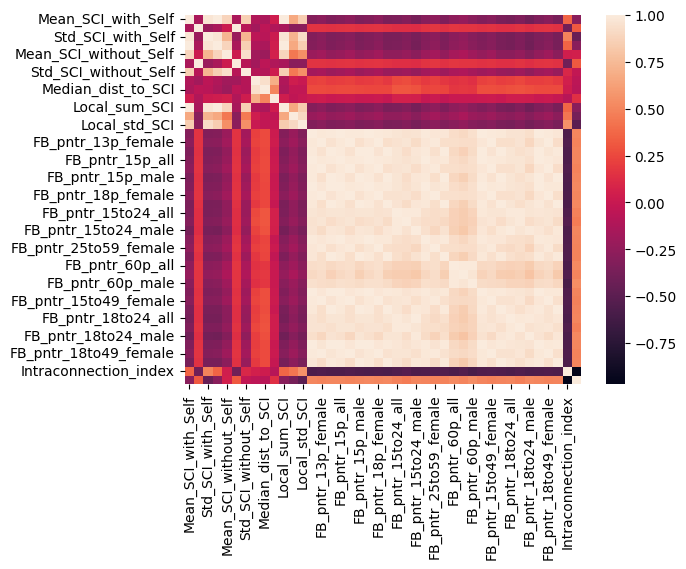

In [35]:
sns.heatmap(FB_pntr_sci_normed.corr())
plt.show()

In [36]:
y = df['score']
x = df['hours']

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())